## Contexte du projet

Les maladies cardiovasculaires sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires.
Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une gestion précoce.

## Objectif 

L'objectif de ce projet est d'utiliser un modèle d'apprentissage automatique pour prédire une éventuelle maladie cardiaque.

## Analyse exploratoire

##### 1-Description des variables

Notre jeux de donnée nous presente 12 caracteristiques qui peuvent etre utilisée pour predire une eventuelle maladie cardiaque.

AGE : Age du patient 

SEXE : sexe du patient (homme, femme)

TDT : type de douleur thoracique (AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique)

PAR : pression artérielle au repos (mm/Hg)

CHOLESTEROL : cholestérol sérique (mm/dl)

GAJ : glycémie à  jeun (1 : si glycémie à jeun > 120 mg/dl, 0 : sinon)

ECG au repos : résultats de l'électrocardiogramme au repos (Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable)

FCMAX : fréquence cardiaque maximale atteinte 

ANGINE : angine induite par l'exercice (Oui, Non)

DEPRESSION : Valeur numérique mesurée en dépression

PENTE: la pente du segment ST d'exercice de pointe (Ascendant, Plat, Descendant)

COEUR : maladie cardiaque (1 : Présence de la maladie, 0 : Absence de la maladie)

##### 2- Informations sur les jeux de données

les données ne sont pas dupliqués. Ils contiennent 12 colonnes et 918 lignes, les variables sont de types int, object et float et nous n'observons aucune donnée manquante.

Nous avons 7 variables qualitatives (SEXE, TDT, ECG, ANGINE, PENTE, GAJ, CŒUR) et 5 variables quantitatives (AGE, PAR, CHOLESTEROL, FCMAX, DEPRESSION).Nous remarquons que les variables GAJ et COEUR qui sont qualitatives ont été recodées et donc se retrouve dans les variables quantitatives.

##### 3- Analyse univariée

###### - variables qualitatives

La variable SEXE nous presente deux modalités (femme et homme) avec une proportion de 78,98 % homme et 21.02 % de femmes

La variable TDT (type de douleur thoracique) nous presente 4 modalités dont la plus signifiante est ASY(asymptomatique) avec 54,05%, ensuite vient DNA (22, 11%) et AA(angine atypique) 18,85%.

La visualisation de l'electrocardiogramme au repos(ECG) permet de voir que 60% des individus ont un ECG normal; 20,48% montre une probable hypertrophie ventriculaire gauche et 19,39% présente une anomalie de l'onde ST-T

50,59% des individus presentent une angine induite par l'exercice et 40,41% pas d'angine.

50,11% ont une pente ascendant plat et 43,03% ascendant.

76,69% des individus presentent un taux de glycémie à jeun < 120 mg/dl et 23,31% ont un taux > 120 mg/dl.

55,34 des individus presentent la maladie et  44,66 ne sont pas malade.

###### - variables quantitatives

les histogrammes des variables AGE, CHOLESTEROL, FCMAX presentent une forme asymetrique(etalé vers la droite et gauche), les moyennes sont tres proches de la mediane donc sont normalement distribuée, les coéficients d'asymetrie etant negatifs ce qui confirme que les distributions sont décalée à droite de la médiane, et donc une queue de distribution étalée vers la gauche. 

l'histogramme de variable PAR presente une forme symetrique, la moyenne est tres proche de la mediane donc normalement distribuée, le coéficient d'asymetrie etant pratiquement nul ce qui confirme que la distribution est symétrique.

l'histogramme de variable DEPRESSION presente une forme asymetrique(etalé vers la droite), la moyenne est eloignée de la mediane donc n'est pas normalement distribuée, le coéficient d'asymetrie etant positif ce qui confirme que la distribution est décalée à gauche de la médiane, et donc une queue de distribution étalée vers la droite. 

visualisation avec le boxplot nous permet de remarquer qu'il ya des valeurs aberrantes au niveau des variables CHOLESTEROL, PAR et DEPRESSION. Toutes les valeurs aberrantes seront traitées dans le pre_processing.


##### 4- Analyse multivariée

###### - Croisement des variables qualitatives 

le croisement des variables qualitatives avec la variable cible nous montre que la majorité des individus ayant une maladie cardiaque sont des hommes(0,63%), avec une douleur toracique asymptomatique(0.57%), un electrocardiogramme au repos normal (0.75%), presentant une angine induite par l'exercice, avec une pente du segment ST d'exercice de pointe plat(0,68%)et un taux de glycemie superieur à 120 mg/dl. les differents tests statistiques montre que les valeurs de p_value sont superieures au seuil( 0,05 ), nous pouvons conclure qu'il n'existe pas une association statistiquement significative entre les variables qualitatives.

###### - Croisement des variables quantitatives 

Dans le pairplot nous n'observons pas de corrélation linéaire entre les variables.
La carte de corrélation nous nontre qu'il existe de tres faible corrélation positive et negative entre le variables quantitatives. le test de correlation confirme les correlations.

###### - Croisement variables quantitatives et  qualitatives

les boxplots font ressortir les caractéristiques suivantes:

Les hommes qui ont une maladie cardiaque ont un age compris entre 50 ans et plus(agés), avec des douleurs thoracique asymptomatique et typique, une pression arterielle au repos qui commence à 125 mmHg(normalement à partir de 118  pour leur age), un mauvais taux de cholesterol(<100mg/dl), un taux de glycemie élévé, l'electrocardiogramme  presente une hypertrophie ventriculaire gauche en generale, leur frequence cardiaque maximale est comprise entre 115 et plus( normalement devrais etre entre 85 et 119 BPM), n'ont en general pas d'angine, une pente ascendant.

Les femmes presentent les memes caracteristiques en generale

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 
from ipywidgets import interact
from scipy.stats import pearsonr, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [2]:
#visualisons notre jeux de données
df = pd.read_excel("data_cardiac.xlsx")
df.head(10)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


In [3]:
#renomons les colones
df.rename(columns={'TDT':'type_douleur_thoracique',
                   'PAR': 'pression_arterielle_repos',
                   'GAJ':'glycemie_a_jeun',
                   'ECG':'electrocardiogramme_repos',
                  'FCMAX':'frequence_cardiaque_max'}, inplace=True)

In [4]:
#voir les données dupliquées
df.duplicated().sum() 

0

In [5]:
#voir les infos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        918 non-null    int64  
 1   SEXE                       918 non-null    object 
 2   type_douleur_thoracique    918 non-null    object 
 3   pression_arterielle_repos  918 non-null    int64  
 4   CHOLESTEROL                918 non-null    int64  
 5   glycemie_a_jeun            918 non-null    int64  
 6   electrocardiogramme_repos  918 non-null    object 
 7   frequence_cardiaque_max    918 non-null    int64  
 8   ANGINE                     918 non-null    object 
 9   DEPRESSION                 918 non-null    float64
 10  PENTE                      918 non-null    object 
 11  CŒUR                       918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#voir les valeurs manquantes
df.isnull().any().sum()

0

In [7]:
#copy des données
df1 = df.copy()

In [8]:
#divisons notre jeux de données

#Données qualitatives
df_qual = df1.select_dtypes(include = object)

#Données quantitatives
df_quant = df1.select_dtypes(exclude = object)

In [9]:
df_qual

,SEXE,type_douleur_thoracique,electrocardiogramme_repos,ANGINE,PENTE
0,homme,AA,Normal,Non,Ascendant
1,femme,DNA,Normal,Non,Plat
2,homme,AA,ST,Non,Ascendant
3,femme,ASY,Normal,Oui,Plat
4,homme,DNA,Normal,Non,Ascendant
...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat
914,homme,ASY,Normal,Non,Plat
915,homme,ASY,Normal,Oui,Plat
916,femme,AA,LVH,Non,Plat


In [10]:
df_qual["type_douleur_thoracique"].value_counts(), df_qual["electrocardiogramme_repos"].value_counts()

(ASY    496
 DNA    203
 AA     173
 AT      46
 Name: type_douleur_thoracique, dtype: int64,
 Normal    552
 LVH       188
 ST        178
 Name: electrocardiogramme_repos, dtype: int64)

In [11]:
#recodons les modalités
df_qual['type_douleur_thoracique'].replace({'ASY':"asymptomatique", 'DNA':"non_angineue", 'AA':"angine_atypique", 'AT':"angine_typique"}, inplace = True)
df_qual['electrocardiogramme_repos'].replace({'Normal':"normal", 'LVH': "hypertrophie", 'ST':"anomalie_ST"}, inplace = True)
df_qual

,SEXE,type_douleur_thoracique,electrocardiogramme_repos,ANGINE,PENTE
0,homme,angine_atypique,normal,Non,Ascendant
1,femme,non_angineue,normal,Non,Plat
2,homme,angine_atypique,anomalie_ST,Non,Ascendant
3,femme,asymptomatique,normal,Oui,Plat
4,homme,non_angineue,normal,Non,Ascendant
...,...,...,...,...,...
913,homme,angine_typique,normal,Non,Plat
914,homme,asymptomatique,normal,Non,Plat
915,homme,asymptomatique,normal,Oui,Plat
916,femme,angine_atypique,hypertrophie,Non,Plat


In [12]:
df_quant

,AGE,pression_arterielle_repos,CHOLESTEROL,glycemie_a_jeun,frequence_cardiaque_max,DEPRESSION,CŒUR
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [13]:
#voir les différentes modalitées des variables
df_qual.nunique(), df_quant.nunique()

(SEXE                         2
 type_douleur_thoracique      4
 electrocardiogramme_repos    3
 ANGINE                       2
 PENTE                        3
 dtype: int64,
 AGE                           50
 pression_arterielle_repos     67
 CHOLESTEROL                  222
 glycemie_a_jeun                2
 frequence_cardiaque_max      119
 DEPRESSION                    53
 CŒUR                           2
 dtype: int64)

In [14]:
#reselectionnons les variables en ajoutans les variables GAJ et COEUR dans les variables qualitatives
df1.columns

Index(['AGE', 'SEXE', 'type_douleur_thoracique', 'pression_arterielle_repos',
       'CHOLESTEROL', 'glycemie_a_jeun', 'electrocardiogramme_repos',
       'frequence_cardiaque_max', 'ANGINE', 'DEPRESSION ', 'PENTE', 'CŒUR'],
      dtype='object')

In [15]:
#Données qualitatives
df_qual = df1[["SEXE", "type_douleur_thoracique", "electrocardiogramme_repos", "ANGINE", "PENTE", "glycemie_a_jeun", "CŒUR"]]

#Données quantitatives
df_quant = df1[["AGE", "pression_arterielle_repos", "CHOLESTEROL", "frequence_cardiaque_max", "DEPRESSION "]]

In [16]:
#renomons les modalités de GAJ et COEUR
df_qual['glycemie_a_jeun'].replace({1:"> 120", 0:"<120"}, inplace = True)
df_qual['CŒUR'].replace({1:"presence_maladie", 0: "absence_maladie"}, inplace = True)
df_qual

,SEXE,type_douleur_thoracique,electrocardiogramme_repos,ANGINE,PENTE,glycemie_a_jeun,CŒUR
0,homme,AA,Normal,Non,Ascendant,<120,absence_maladie
1,femme,DNA,Normal,Non,Plat,<120,presence_maladie
2,homme,AA,ST,Non,Ascendant,<120,absence_maladie
3,femme,ASY,Normal,Oui,Plat,<120,presence_maladie
4,homme,DNA,Normal,Non,Ascendant,<120,absence_maladie
...,...,...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat,<120,presence_maladie
914,homme,ASY,Normal,Non,Plat,> 120,presence_maladie
915,homme,ASY,Normal,Oui,Plat,<120,presence_maladie
916,femme,AA,LVH,Non,Plat,<120,presence_maladie


In [17]:
#visualisation qualitatives
def qual_plot (variable):
    fig, ax = plt.subplots(figsize=(12, 6), nrows=1, ncols=2) 
    sn.countplot(df_qual[variable], palette = "Set2", ax=ax[0]);
    df_qual[variable].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1]);    
    return plt.show()

In [18]:
#visualisation interactive: choisir la variable a visualiser
interact(qual_plot, variable = df_qual);

interactive(children=(Dropdown(description='variable', options=('SEXE', 'type_douleur_thoracique', 'electrocar…

In [19]:
#statistique des variables quantitatives
df_quant.describe()

,AGE,pression_arterielle_repos,CHOLESTEROL,frequence_cardiaque_max,DEPRESSION
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [20]:
#visualisation quantitatives
def quant_plot (variable):
    fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
    sn.boxplot(y=df_quant[variable], color = 'g', ax=ax[0])
    sn.distplot(df_quant[variable], kde = True, color = 'g', ax=ax[1]);
    plt.axvline(x = df_quant[variable].mean(), c ='r', label='Moyenne');
    plt.axvline(x = df_quant[variable].median(), c ='black', label='Médiane');
    plt.title('Distribution de la variable ' + str(variable)), plt.legend();
    return plt.show();

In [21]:
interact(quant_plot, variable = df_quant);

interactive(children=(Dropdown(description='variable', options=('AGE', 'pression_arterielle_repos', 'CHOLESTER…

In [22]:
#coefficient d'asymetrie des variables quantitatives continues
df_quant.skew()

AGE                         -0.195933
pression_arterielle_repos    0.179839
CHOLESTEROL                 -0.610086
frequence_cardiaque_max     -0.144359
DEPRESSION                   1.022872
dtype: float64

In [23]:
#visualisation multivariée qualitatives
def plots_qual(variable):
    plt.figure(figsize=(15, 6))
    sn.countplot(x = variable, hue = "CŒUR", data = df_qual, palette = "Set2" );

In [24]:
interact(plots_qual, variable = df_qual);

interactive(children=(Dropdown(description='variable', options=('SEXE', 'type_douleur_thoracique', 'electrocar…

In [25]:
#tableau de contingence
A = pd.crosstab([df_qual.CŒUR, df_qual.SEXE], df_qual.ANGINE).apply(lambda z: z/z.sum(), axis = 1)
A

ANGINE                       Non       Oui
CŒUR             SEXE                     
absence_maladie  femme  0.888112  0.111888
                 homme  0.853933  0.146067
presence_maladie femme  0.460000  0.540000
                 homme  0.368996  0.631004

In [26]:
#test de ch2
chi2, pvalue, degrees, expected = chi2_contingency(A)
chi2, degrees, pvalue

(0.9282290310358097, 3, 0.8186106991079064)

In [27]:
B=pd.crosstab([df_qual.CŒUR, df_qual.type_douleur_thoracique], df_qual.electrocardiogramme_repos).apply(lambda z: z/z.sum(), axis = 1)
B

electrocardiogramme_repos                      LVH    Normal        ST
CŒUR             type_douleur_thoracique                              
absence_maladie  AA                       0.107383  0.751678  0.140940
                 ASY                      0.201923  0.576923  0.221154
                 AT                       0.423077  0.423077  0.153846
                 DNA                      0.259542  0.641221  0.099237
presence_maladie AA                       0.291667  0.458333  0.250000
                 ASY                      0.206633  0.571429  0.221939
                 AT                       0.250000  0.550000  0.200000
                 DNA                      0.180556  0.541667  0.277778

In [28]:
chi2, pvalue, degrees, expected = chi2_contingency(B)
chi2, degrees, pvalue

(0.509252088887463, 14, 0.9999999889769273)

In [29]:
C = pd.crosstab([df_qual.CŒUR, df_qual.PENTE], df_qual.glycemie_a_jeun).apply(lambda z: z/z.sum(), axis = 1)
C

glycemie_a_jeun                  <120     > 120
CŒUR             PENTE                         
absence_maladie  Ascendant   0.899054  0.100946
                 Descendant  0.642857  0.357143
                 Plat        0.911392  0.088608
presence_maladie Ascendant   0.628205  0.371795
                 Descendant  0.591837  0.408163
                 Plat        0.682415  0.317585

In [30]:
chi2, pvalue, degrees, expected = chi2_contingency(C)
chi2, degrees, pvalue

(0.506146889717021, 5, 0.9918964893575578)

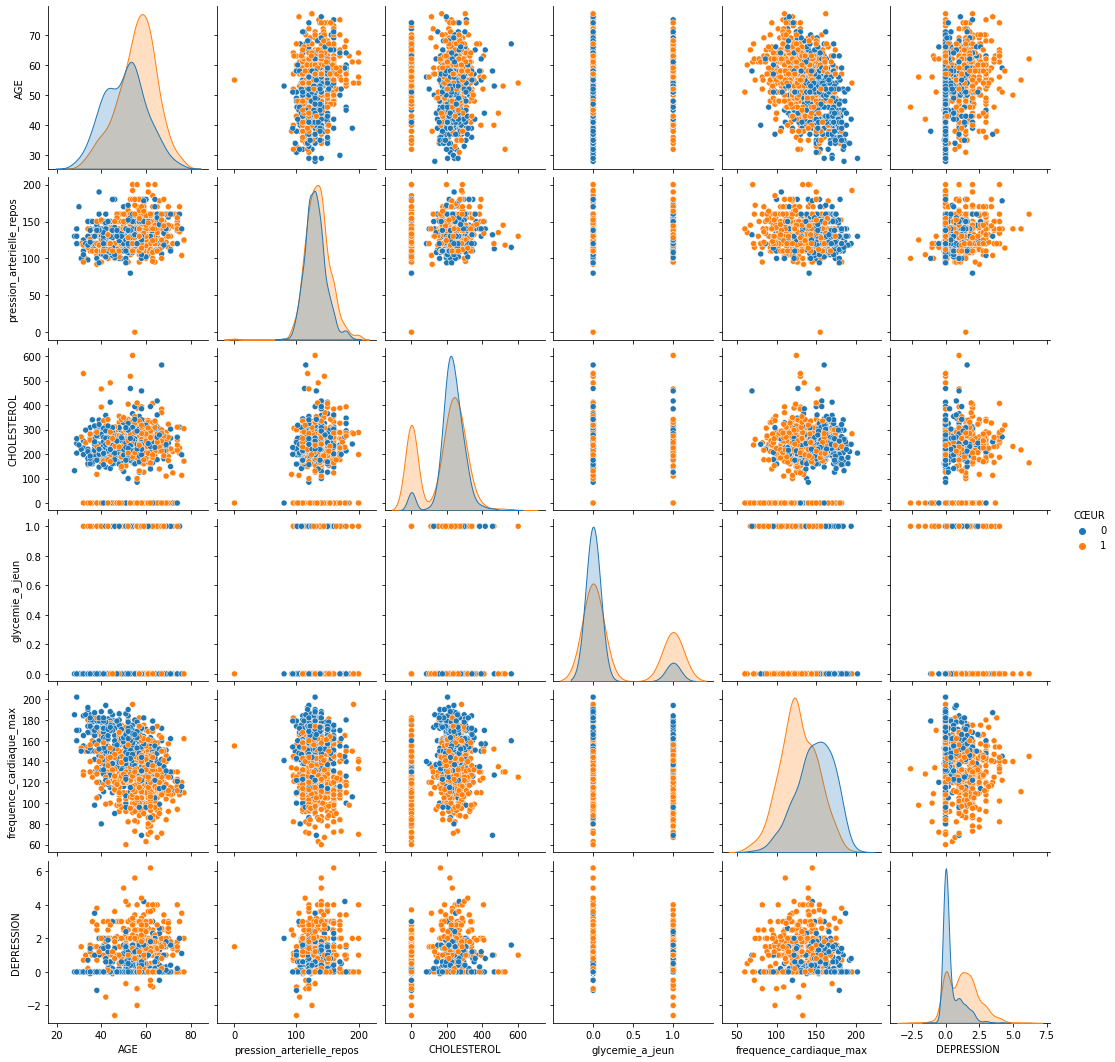

In [31]:
#visualisation multivariée quantitatives
sn.pairplot(df1, hue = "CŒUR");

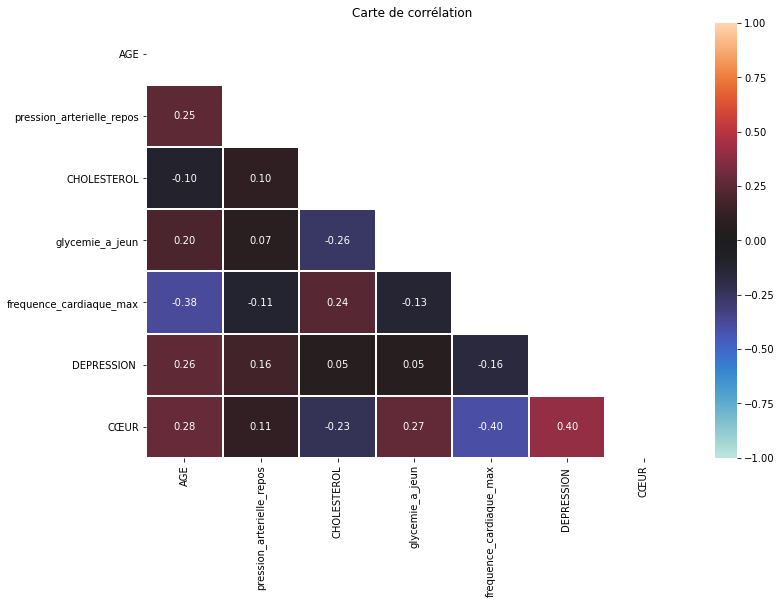

In [32]:
#carte de correlation
def plot_heatmap(df1):
    plt.figure(figsize = (12,8))
    mask =  np.triu(np.ones_like(df.corr(), dtype=bool)) # afficher les test de correlation
    sn.heatmap(df.corr(), mask = mask, center=0, linewidths=1, annot= True, fmt = '.2f', vmin=-1, vmax=1) 
    plt.title('Carte de corrélation ')
    plt.show
    
plot_heatmap(df_quant)

In [33]:
#verification du test de correlation avec deux variables 
corr, _ = pearsonr(df_quant["AGE"], df_quant["frequence_cardiaque_max"]) 
print('Le résultat du test de correlation est: %.3f' % corr) 


Le résultat du test de correlation est: -0.382


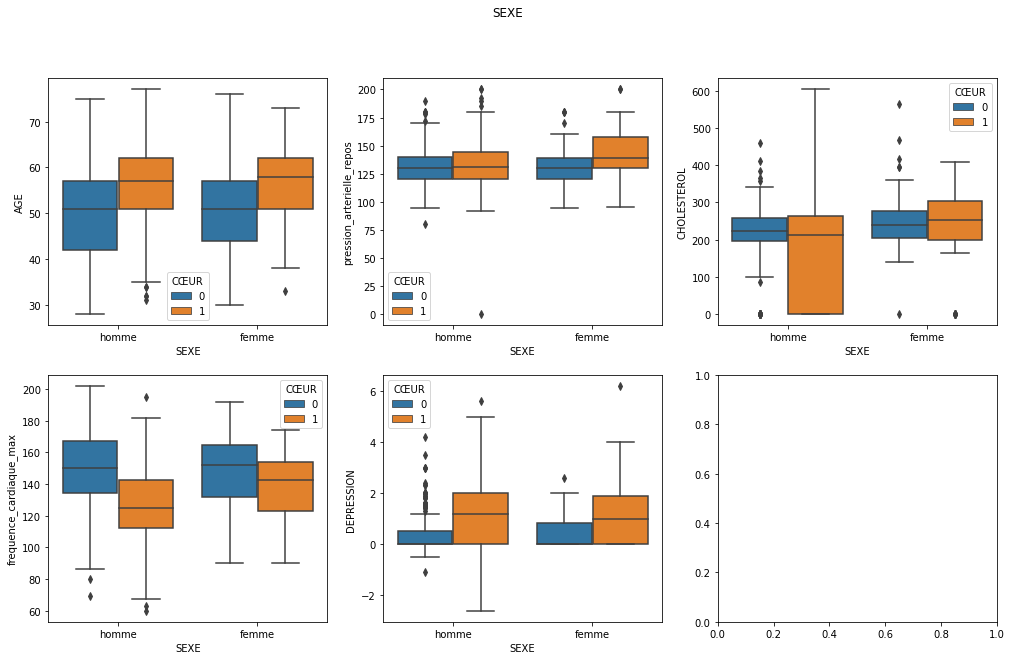

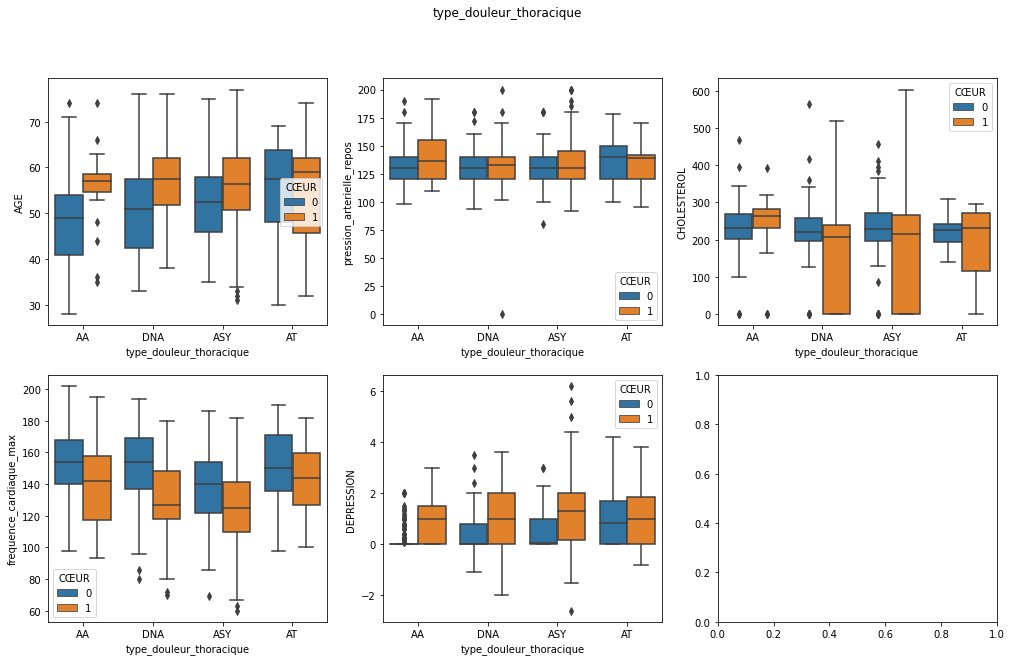

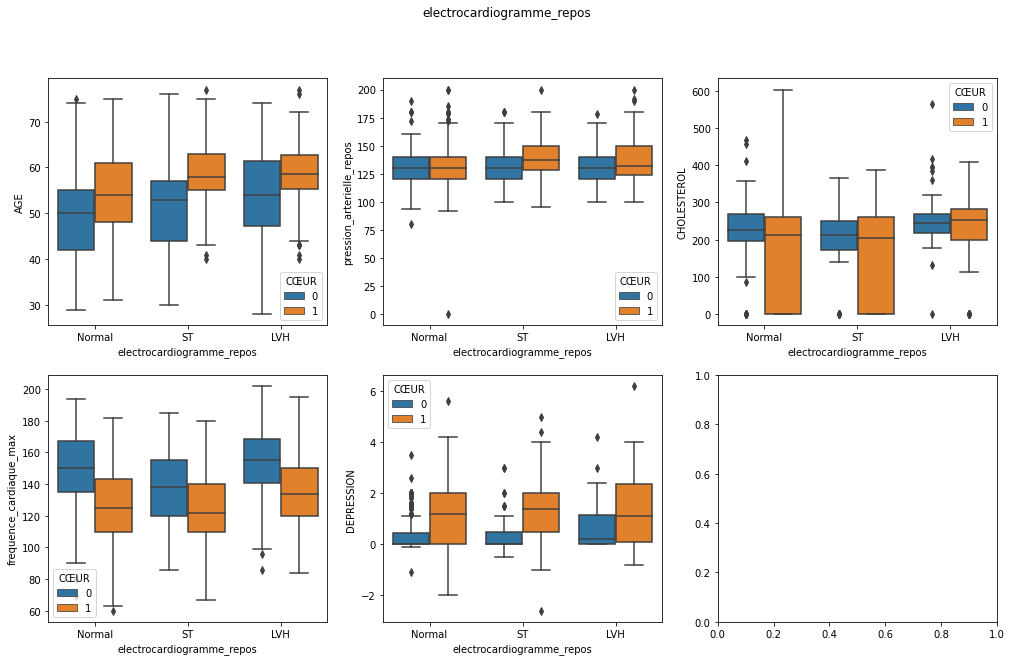

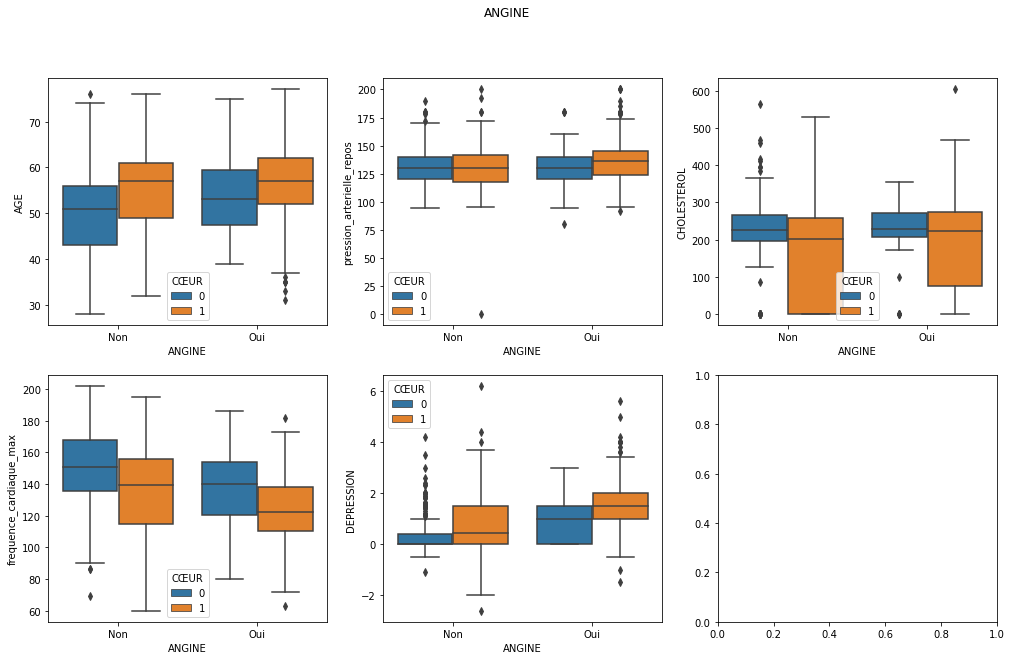

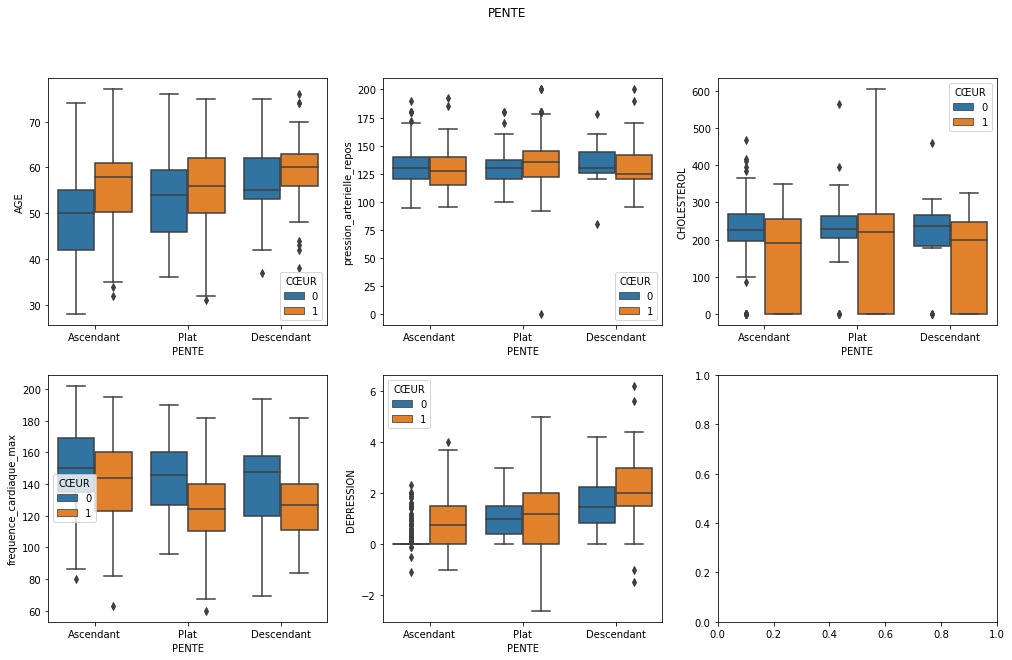

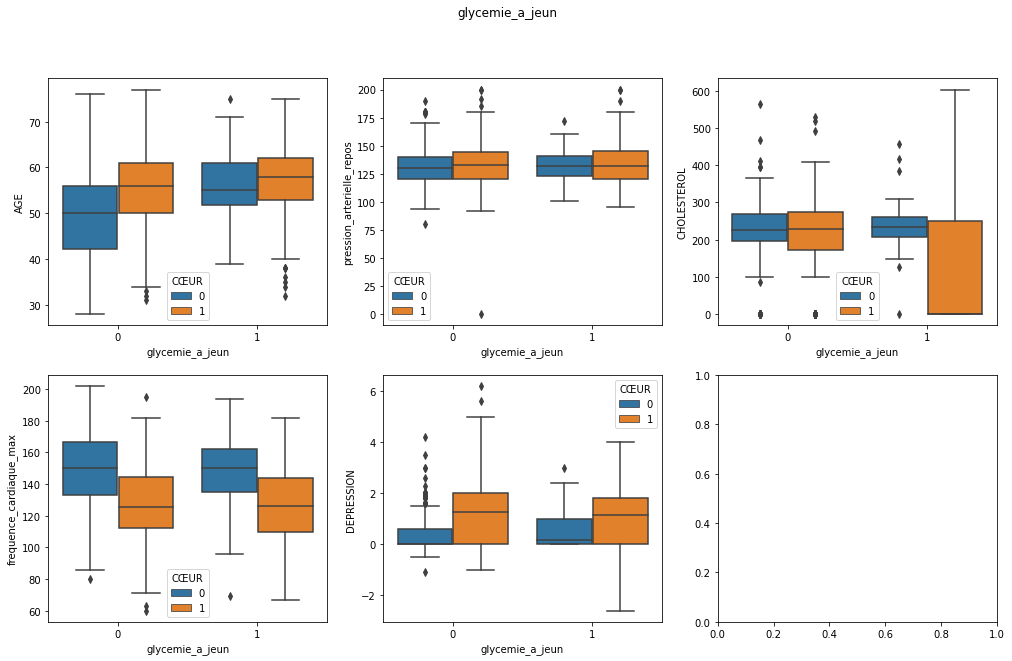

In [34]:
col = ['SEXE', 'type_douleur_thoracique', 'electrocardiogramme_repos',
        'ANGINE', 'PENTE', 'glycemie_a_jeun'] 
col2 = ['AGE', 'pression_arterielle_repos', 'CHOLESTEROL',
        'frequence_cardiaque_max', 'DEPRESSION ']
for i, feature in enumerate(col):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10)) 
    fig.suptitle(feature)
    for ind, u in enumerate (col2):  
        ax = axes[int(ind/3), ind%3]
        if feature != 'CŒUR':
            sn.boxplot(x= feature, y = u, hue='CŒUR', data=df1, ax=ax)

## Pré-processing

Dans l'analyse exploratoire nous avons décélé des valeurs aberrantes au niveau des variables CHOLESTEROL, PAR et DEPRESSION. Etant donné que nous pouvons avoir un taux de cholesterol elevée jusqu'a 600  , une pression arterielle au delas de 200, nous allons conserver ses valeurs aberrantes. Si notre modelisation n'est pas satisfesante, nous reviendrons traiter ses valeurs.Apres avoir encodé nos variables qualitatives et normaliser nos variables quantitatives, nous divisons nos jeux de données en données d'entrainnement, de test et de validation.

Dans notre analyse exploratoire, nous avons visualisés un déséquilibre de classe au niveau de la variable a predire, nous allons resoudre ce probleme par un sur echantillonnage c'est à dire que nous allons ajouter des echantillons dans la classe la plus petite.

In [35]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [36]:
df2 = df.copy()

In [37]:
df2_quant = df2.select_dtypes(exclude = object)
df2_quant.head(5)

,AGE,pression_arterielle_repos,CHOLESTEROL,glycemie_a_jeun,frequence_cardiaque_max,DEPRESSION,CŒUR
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [38]:
df2_qual = df2.select_dtypes(object)
df2_qual.head(5)

,SEXE,type_douleur_thoracique,electrocardiogramme_repos,ANGINE,PENTE
0,homme,AA,Normal,Non,Ascendant
1,femme,DNA,Normal,Non,Plat
2,homme,AA,ST,Non,Ascendant
3,femme,ASY,Normal,Oui,Plat
4,homme,DNA,Normal,Non,Ascendant


In [39]:
#voir les valeurs manquantes
df2.isnull().any().sum()

0

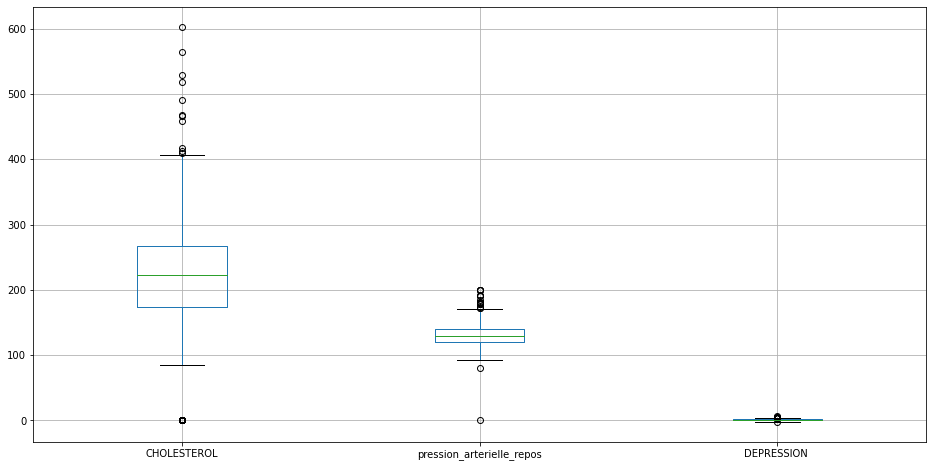

In [40]:
#visualisons les valeurs aberrantes
outlier = df2_quant[[ "CHOLESTEROL", "pression_arterielle_repos", "DEPRESSION "]]
outlier.boxplot(figsize=(16,8));

In [41]:
# #traitement des valeurs aberrantes par la mediane
# def outliers(df):
#     for i in df.describe().columns:
#         Q1=df.describe().at['25%',i]
#         Q3=df.describe().at['75%',i]
#         IQR=Q3 - Q1
#         LTV=Q1 - 1.5 * IQR
#         UTV=Q3 + 1.5 * IQR
#         x=np.array(df[i])
#         p=[]
#         for j in x:
#             if j < LTV or j>UTV:
#                 p.append(df[i].median())
#             else:
#                 p.append(j)
#         df[i]=p
#     return df

In [42]:
# outliers(outlier).boxplot(figsize=(16,8));

In [43]:
#encodage des variables qualitatives 
df2_qual['SEXE'].replace({'homme':0, 'femme':1}, inplace = True)   
df2_qual['ANGINE'].replace({'oui':0, 'non':1}, inplace = True)

In [44]:
#encodage des autres variables qualitatives
df2_quals = df2_qual[['type_douleur_thoracique', 'electrocardiogramme_repos', 'PENTE']]
data2 = pd.get_dummies(df2_quals , dummy_na = False)
data2

,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,0,0,1
2,1,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
913,0,0,1,0,0,1,0,0,0,1
914,0,1,0,0,0,1,0,0,0,1
915,0,1,0,0,0,1,0,0,0,1
916,1,0,0,0,1,0,0,0,0,1


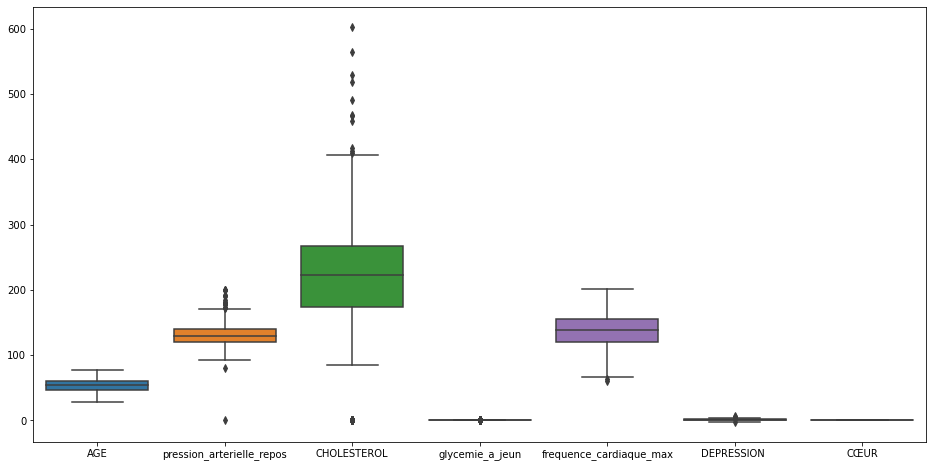

In [45]:
#verifier l'echelle des variables quantitatives
plt.figure(figsize=(16,8))
sn.boxplot(data = df2_quant);

In [46]:
pd.set_option('max_columns', None)
fusion = pd.concat([df2, data2] , axis = 1 )
fusion.head(5)

,AGE,SEXE,type_douleur_thoracique,pression_arterielle_repos,CHOLESTEROL,glycemie_a_jeun,electrocardiogramme_repos,frequence_cardiaque_max,ANGINE,DEPRESSION,PENTE,CŒUR,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0,1,0,0,0,0,1,0,1,0,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1,0,0,0,1,0,1,0,0,0,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0,1,0,0,0,0,0,1,1,0,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1,0,1,0,0,0,1,0,0,0,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0,0,0,0,1,0,1,0,1,0,0


In [47]:
#normalisation des variables quantitatives
scaler = RobustScaler()
df2_quant = df2_quant.drop('CŒUR', axis = 1)
df2_quant = df2_quant.drop('glycemie_a_jeun', axis = 1)
df2_quant[df2_quant.columns] = scaler.fit_transform(df2_quant)
df2_quant

,AGE,pression_arterielle_repos,CHOLESTEROL,frequence_cardiaque_max,DEPRESSION
0,-1.076923,0.5,0.704000,0.944444,-0.400000
1,-0.384615,1.5,-0.458667,0.500000,0.266667
2,-1.307692,0.0,0.640000,-1.111111,-0.400000
3,-0.461538,0.4,-0.096000,-0.833333,0.600000
4,0.000000,1.0,-0.298667,-0.444444,-0.400000
...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,-0.166667,0.400000
914,1.076923,0.7,-0.320000,0.083333,1.866667
915,0.230769,0.0,-0.981333,-0.638889,0.400000
916,0.230769,0.0,0.138667,1.000000,-0.400000


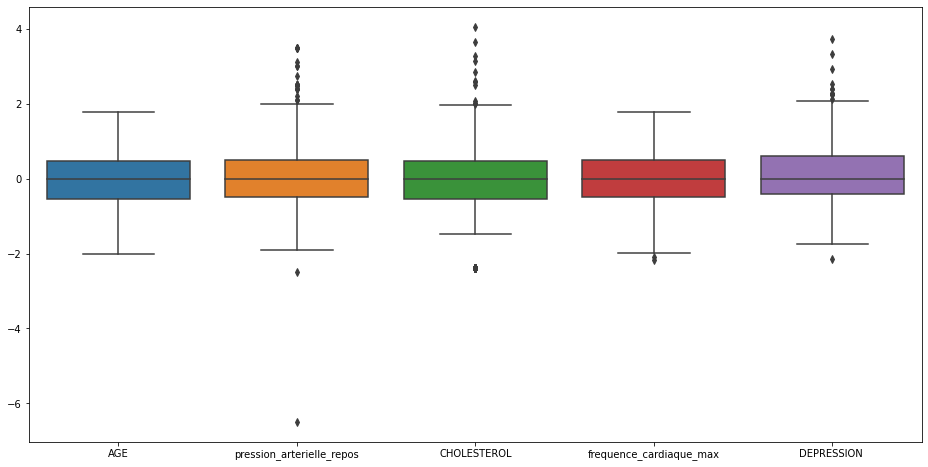

In [48]:
#verifions l'echelle des variables quantitatives
plt.figure(figsize=(16,8));
sn.boxplot(data = df2_quant);

In [49]:
#rajoutons nos deux variables supprimés
df2_quant['CŒUR'] = fusion['CŒUR']
df2_quant['glycemie_a_jeun'] = fusion['glycemie_a_jeun']
df2_quant


,AGE,pression_arterielle_repos,CHOLESTEROL,frequence_cardiaque_max,DEPRESSION,CŒUR,glycemie_a_jeun
0,-1.076923,0.5,0.704000,0.944444,-0.400000,0,0
1,-0.384615,1.5,-0.458667,0.500000,0.266667,1,0
2,-1.307692,0.0,0.640000,-1.111111,-0.400000,0,0
3,-0.461538,0.4,-0.096000,-0.833333,0.600000,1,0
4,0.000000,1.0,-0.298667,-0.444444,-0.400000,0,0
...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,-0.166667,0.400000,1,0
914,1.076923,0.7,-0.320000,0.083333,1.866667,1,1
915,0.230769,0.0,-0.981333,-0.638889,0.400000,1,0
916,0.230769,0.0,0.138667,1.000000,-0.400000,1,0


In [50]:
#concatenons nos données 
data = pd.concat([df2_quant, data2] , axis = 1 )
data

,AGE,pression_arterielle_repos,CHOLESTEROL,frequence_cardiaque_max,DEPRESSION,CŒUR,glycemie_a_jeun,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,-1.076923,0.5,0.704000,0.944444,-0.400000,0,0,1,0,0,0,0,1,0,1,0,0
1,-0.384615,1.5,-0.458667,0.500000,0.266667,1,0,0,0,0,1,0,1,0,0,0,1
2,-1.307692,0.0,0.640000,-1.111111,-0.400000,0,0,1,0,0,0,0,0,1,1,0,0
3,-0.461538,0.4,-0.096000,-0.833333,0.600000,1,0,0,1,0,0,0,1,0,0,0,1
4,0.000000,1.0,-0.298667,-0.444444,-0.400000,0,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,-0.166667,0.400000,1,0,0,0,1,0,0,1,0,0,0,1
914,1.076923,0.7,-0.320000,0.083333,1.866667,1,1,0,1,0,0,0,1,0,0,0,1
915,0.230769,0.0,-0.981333,-0.638889,0.400000,1,0,0,1,0,0,0,1,0,0,0,1
916,0.230769,0.0,0.138667,1.000000,-0.400000,1,0,1,0,0,0,1,0,0,0,0,1


In [51]:
#divisons notre data pour faire la modelisation

X = data.drop(['CŒUR'], axis=1)
y = data['CŒUR'] 

#60% pour le train, 20% pour la validation, et 20 % pour le test

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.4, random_state = 0,stratify = y)

X_val, X_test, y_val, y_test =  train_test_split(X_test, y_test, test_size = 0.5, random_state = 0, stratify = y_test)
#stratify pour le déséquilibre des classes permet de preserver la distribution de la variable cible
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(550, 16)
(550,)
(184, 16)
(184,)
(184, 16)
(184,)


In [52]:
#traitons le désequilibre de classe
#on augmente la plus petite classe(sur echantillonnage)
X2 = X_train
X2['CŒUR'] = y_train.values

In [53]:
# on definie les classes minoritaire et majoritaires
Mino = X2[X2.CŒUR == 0 ]
Majo = X2[X2.CŒUR == 1]

In [54]:
# augmentons la plus petite classe 
echant1 = resample(Mino, replace = True, n_samples = len(Majo))
echant1

,AGE,pression_arterielle_repos,CHOLESTEROL,frequence_cardiaque_max,DEPRESSION,glycemie_a_jeun,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,CŒUR
101,-0.230769,0.00,-0.469333,-1.055556,-0.400000,0,0,1,0,0,0,1,0,1,0,0,0
701,0.615385,-0.10,-0.160000,0.055556,-0.400000,1,1,0,0,0,1,0,0,1,0,0,0
118,-1.461538,-0.50,-0.672000,1.305556,-0.400000,0,0,0,1,0,0,0,1,1,0,0,0
549,1.076923,0.45,-0.448000,-0.083333,-0.266667,1,0,0,1,0,0,0,1,1,0,0,0
780,0.769231,2.50,1.088000,0.444444,-0.400000,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,-0.230769,1.50,-0.309333,0.888889,-0.400000,0,1,0,0,0,0,1,0,1,0,0,0
87,-0.076923,0.50,-0.074667,0.111111,0.933333,0,1,0,0,0,0,1,0,0,0,1,0
527,0.538462,0.45,0.640000,-0.083333,-0.200000,0,1,0,0,0,0,1,0,1,0,0,0
282,-0.230769,0.00,-0.032000,0.611111,0.933333,0,0,0,0,1,0,1,0,1,0,0,0


In [55]:
equilibre = pd.concat([Majo, echant1])
equilibre

,AGE,pression_arterielle_repos,CHOLESTEROL,frequence_cardiaque_max,DEPRESSION,glycemie_a_jeun,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,CŒUR
494,0.461538,0.60,-0.074667,-0.777778,1.266667,0,0,1,0,0,0,1,0,0,0,1,1
466,0.076923,-0.50,-2.378667,-0.361111,1.266667,0,0,0,0,1,0,0,1,0,0,1,1
483,0.307692,-0.50,-2.378667,-0.888889,0.600000,0,0,1,0,0,1,0,0,0,1,0,1
306,0.076923,-0.75,-2.378667,0.472222,-0.333333,1,0,1,0,0,0,1,0,0,0,1,1
543,1.230769,2.00,-0.330667,-0.250000,1.600000,0,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,-0.230769,1.50,-0.309333,0.888889,-0.400000,0,1,0,0,0,0,1,0,1,0,0,0
87,-0.076923,0.50,-0.074667,0.111111,0.933333,0,1,0,0,0,0,1,0,0,0,1,0
527,0.538462,0.45,0.640000,-0.083333,-0.200000,0,1,0,0,0,0,1,0,1,0,0,0
282,-0.230769,0.00,-0.032000,0.611111,0.933333,0,0,0,0,1,0,1,0,1,0,0,0


In [56]:
X_train_up = equilibre.drop(['CŒUR'], axis=1)
y_train_up = equilibre['CŒUR']

## Modélisation

Pour la modelisation nous allons tester plusieurs modèle et choisir celui qui a la meilleure performance. Comme nous sommes confronté a un probleme de classification, nous allons utiliser quelque modèle destiné à la classification.

La selection des variables imortantes nous a permis de déceler les différentes variables qui vont nous servir dans la modelisation.

Apres plusieurs modelisation , le meilleur modele possible est le svc avec un precison total de 0,87 ,une precision de 0, 91 pour la prediction des individus malade et 0.83 pour les non malade. Ce qui signifie que lorsque notre modele(classificateur svc) predit un malade, la probalité que cette prediction soit un vrai malade est de 91%, la probalité que notre prediction soit un non malade est de 0,83.  


In [57]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix

In [58]:
#un premier modele de depart
m_rf = RandomForestClassifier(random_state=0)
m_rf.fit(X_train_up, y_train_up)

accuracy_score (y_val, m_rf.predict(X_val))

0.8586956521739131

In [59]:
#selection des variables importantes importantes
print(X_train_up.columns)
print(m_rf.feature_importances_)

Index(['AGE', 'pression_arterielle_repos', 'CHOLESTEROL',
       'frequence_cardiaque_max', 'DEPRESSION ', 'glycemie_a_jeun',
       'type_douleur_thoracique_AA', 'type_douleur_thoracique_ASY',
       'type_douleur_thoracique_AT', 'type_douleur_thoracique_DNA',
       'electrocardiogramme_repos_LVH', 'electrocardiogramme_repos_Normal',
       'electrocardiogramme_repos_ST', 'PENTE_Ascendant', 'PENTE_Descendant',
       'PENTE_Plat'],
      dtype='object')
[0.08095579 0.07696553 0.12611553 0.10713844 0.13416636 0.01999521
 0.03913583 0.10311592 0.00892789 0.01431868 0.0178954  0.01445381
 0.01293131 0.14613195 0.00729012 0.09046222]


In [60]:
variable_importante = pd.Series(m_rf.feature_importances_ , index = X_train_up.columns).sort_values(ascending = False)
variable_importante 

PENTE_Ascendant                     0.146132
DEPRESSION                          0.134166
CHOLESTEROL                         0.126116
frequence_cardiaque_max             0.107138
type_douleur_thoracique_ASY         0.103116
PENTE_Plat                          0.090462
AGE                                 0.080956
pression_arterielle_repos           0.076966
type_douleur_thoracique_AA          0.039136
glycemie_a_jeun                     0.019995
electrocardiogramme_repos_LVH       0.017895
electrocardiogramme_repos_Normal    0.014454
type_douleur_thoracique_DNA         0.014319
electrocardiogramme_repos_ST        0.012931
type_douleur_thoracique_AT          0.008928
PENTE_Descendant                    0.007290
dtype: float64

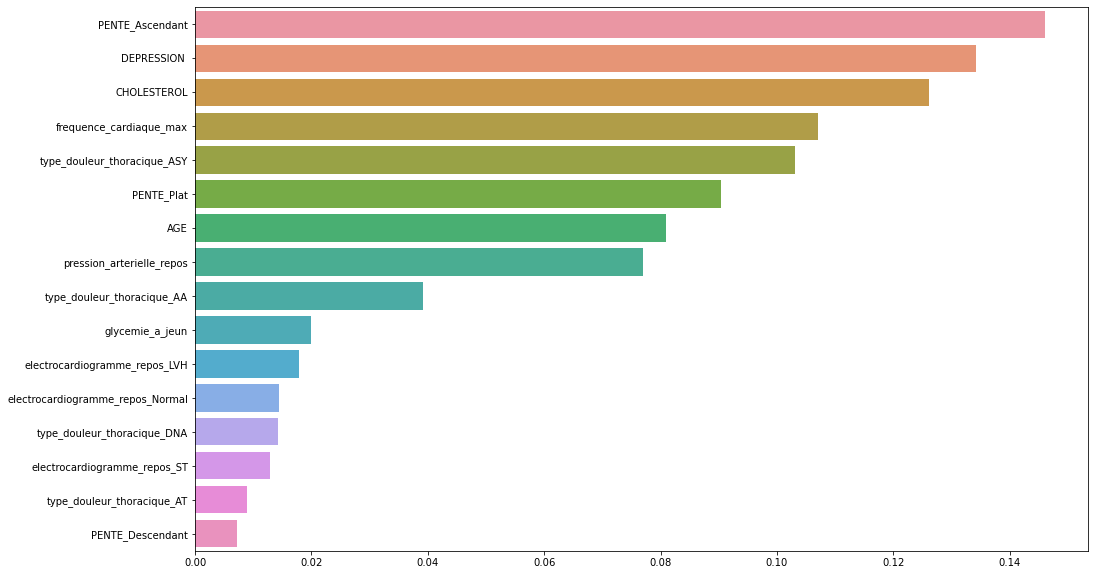

In [61]:
plt.figure(figsize=(16,10))
sn.barplot(x = variable_importante, y = variable_importante.index)
plt.show()

In [62]:
#variable qui ne nous servirns plus
variable_n_imp = ['PENTE_Descendant', 'type_douleur_thoracique_AT', 'electrocardiogramme_repos_ST', 'electrocardiogramme_repos_Normal', 'electrocardiogramme_repos_LVH', 'type_douleur_thoracique_DNA', 'glycemie_a_jeun', 'type_douleur_thoracique_AA']

In [63]:
X_train_up = X_train_up.drop(variable_n_imp, axis = 1)
X_val = X_val.drop(variable_n_imp, axis = 1)
X_test = X_test.drop(variable_n_imp, axis = 1)

In [64]:
#plusieurs modelisations

model1 = GaussianNB()
model3 = KNeighborsClassifier()
model4 = LogisticRegression(random_state = 0)
model5 = SVC(random_state = 0)
model6 = BaggingClassifier(n_estimators=100)
model7 = RandomForestClassifier(random_state = 0)


for model in (model1, model3, model4, model5, model6):
    model.fit(X_train_up, y_train_up)
    print(model.__class__.__name__, model.score(X_val, y_val))

GaussianNB 0.875
KNeighborsClassifier 0.8043478260869565
LogisticRegression 0.842391304347826
SVC 0.842391304347826
BaggingClassifier 0.8097826086956522


In [65]:
#ameliorons les parametres des modeles
#foret aléatoire

m_fa = RandomForestClassifier(random_state = 0)

m_fa_hyp = {'n_estimators' : [5, 10, 20, 50, 100, 200],
           'max_depth': [None, 2, 5, 10, 15, 20]}

m_fa_cv = GridSearchCV(m_fa, m_fa_hyp, cv = 5)

m_fa_cv.fit(X_train_up, y_train_up)

print("Le Score final est: ", m_fa_cv.best_score_)
print("Meilleur configuration: ", m_fa_cv.best_estimator_)

Le Score final est:  0.8997154857065439
Meilleur configuration:  RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)


In [66]:
#gaussian
m_g = GaussianNB(priors=None, var_smoothing=1e-09)

m_g.fit(X_train_up, y_train_up)

print(m_g.score(X_val, y_val))

0.875


In [67]:
#regression logistique
m_log = LogisticRegression(random_state = 0, C=1)

m_log_hyp = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

m_log_cv = GridSearchCV(m_log, m_log_hyp, cv = 5)

m_log_cv.fit(X_train_up, y_train_up)
print(m_log_cv.best_score_)
print(m_log_cv.best_estimator_)

0.8388700718059884
LogisticRegression(C=1, random_state=0)


In [68]:
#svc
m_svc = SVC(kernel="linear", probability=True, gamma=1, C=1, random_state=0)
m_svc.fit(X_train_up, y_train_up)
print(m_svc.score(X_val, y_val))

0.842391304347826


In [69]:
#Evaluation les performances des modeles
def evalue (model, features, labels):
    pred = model.predict(features)
    score = accuracy_score(y_val, pred)
    print('Score global du modèle :', round(score, 3))

In [70]:
models  = (m_fa_cv.best_estimator_, m_g, m_log_cv.best_estimator_, m_svc)
for model in models :
    print('Modèle ' + str(model))
    evalue(model, X_val, y_val)
    print('-'*90)

Modèle RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)
Score global du modèle : 0.842
------------------------------------------------------------------------------------------
Modèle GaussianNB()
Score global du modèle : 0.875
------------------------------------------------------------------------------------------
Modèle LogisticRegression(C=1, random_state=0)
Score global du modèle : 0.842
------------------------------------------------------------------------------------------
Modèle SVC(C=1, gamma=1, kernel='linear', probability=True, random_state=0)
Score global du modèle : 0.842
------------------------------------------------------------------------------------------


In [71]:
# Performances du modele sur les données test
for model in models:
    print(model,accuracy_score(y_test, model.predict(X_test))) 

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0) 0.8532608695652174
GaussianNB() 0.8586956521739131
LogisticRegression(C=1, random_state=0) 0.8695652173913043
SVC(C=1, gamma=1, kernel='linear', probability=True, random_state=0) 0.8695652173913043


In [72]:
#choix du modele
model = m_svc
y_pred = model.predict(X_test)
y_pred    

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [73]:
#matrice de confusion pour evaluer la performance du modele
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion \n", cm)

Matrice de confusion 
 [[73  9]
 [15 87]]


In [74]:
# vrai positif 71
# faux negatif 11
# faux positi 14
# vrai negatif 88

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        82
           1       0.91      0.85      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



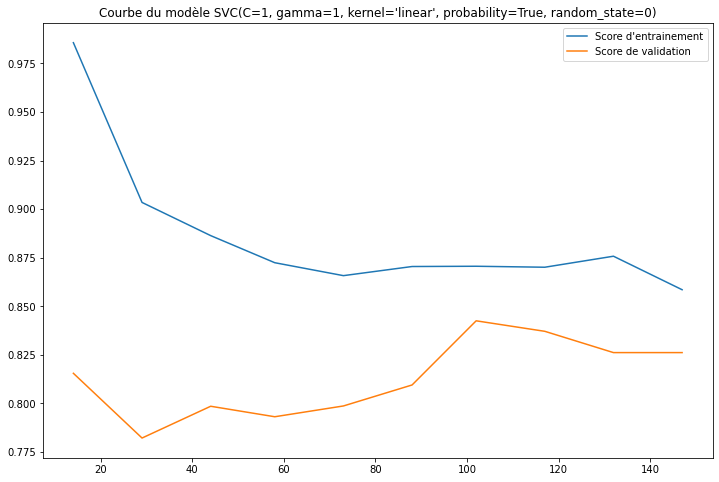

In [77]:
#visualisation finale
model  = m_svc
N, train_score, val_score = learning_curve(model, X_test, y_test,cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.title(f"Courbe du modèle {model}")
plt.plot(N, train_score.mean(axis=1), label = "Score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = 'Score de validation')
plt.legend();